<center>
    <h1> Programación Científica </h1>
    <h1> Actividad Clase 2 </h1>
    <h3> Aldo Berrios Valenzuela  </h3>
    <h3> 201304018-7 </h3>
    <h4> `aldo.berrios.13@sansano.usm.cl` </h4>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [2]:
# first we load the data:
data = np.load("orion.npy")
data_2 = np.load("orion.npy")

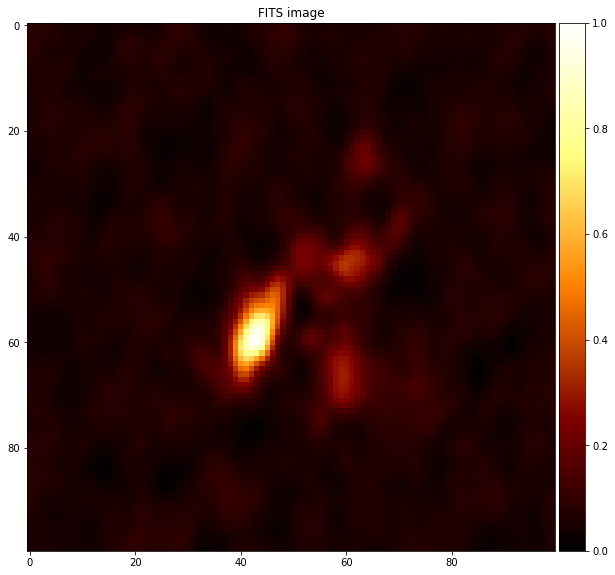

In [3]:
image_plot(data)

## Paso 1

Calculamos el valor $\mathit{RMS}$ de la imagen entregada usando la fórmula:

\begin{align*}
    \mathit{RMS} = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}
\end{align*}

Para ello, usamos el siguiente código:

In [4]:
RMS = 1/(data.shape[0] * data.shape[1]) * np.sum(data ** 2)
print ("RMS = " + str(RMS))

RMS = 0.0100570968628


## Paso 2

Lo primero que haremos será comprobar que todos los números presentes en `data` sean positivos. Lo hacemos a través del siguiente código:

In [5]:
np.sum(data < np.zeros((100, 100)))

0

Dado que `data` se compone únicamente de números positivos, podemos hacer que los pixeles bajo el valor $RMS$ sean considerados como *no usables* a través del siguiente código:

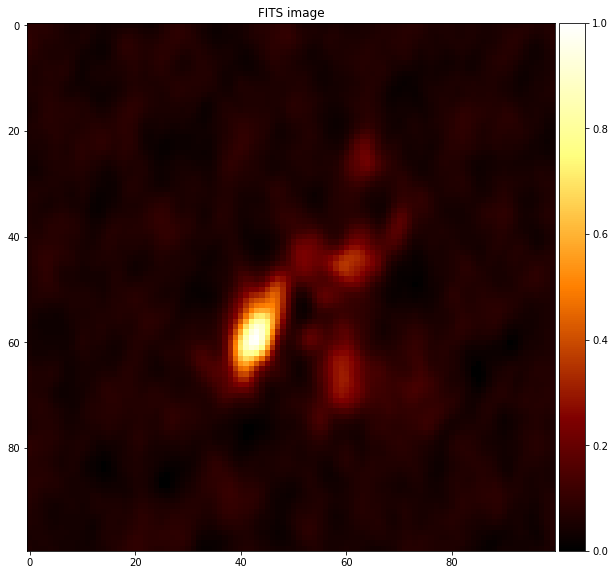

In [6]:
data_2[data < RMS] = 0
image_plot(data_2)

A simple vista, la imagen resultante no presenta diferencias respecto a la imagen original.

## Paso 3

Definimos el algoritmo

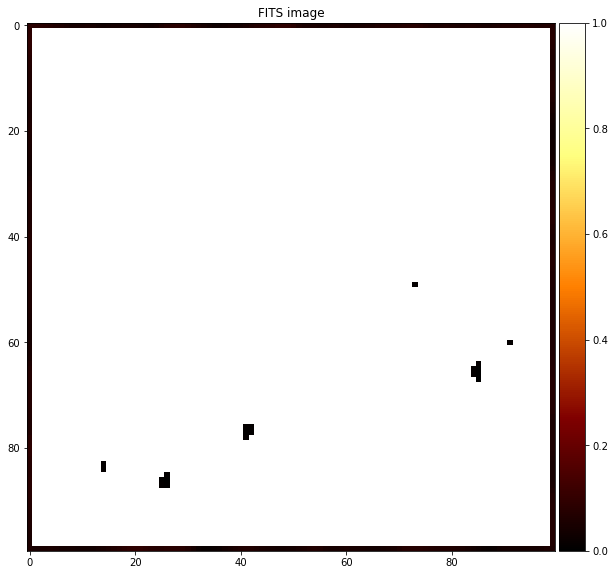

In [7]:
def apply_filter(data, mask, kernel_filter):
    for i in range(1,100):
        for j in range(1,100):
            if mask[i, j] and kernel_filter.shape == data[i-1:i+2,j-1:j+2].shape:
                data[i, j] = np.sum(data[i-1:i+2,j-1:j+2] * kernel_filter)
    image_plot(data)
    return None



kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])
mask = data > RMS

apply_filter(data, mask, kernel_filter)